In [188]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import clear_output
from icecream import ic

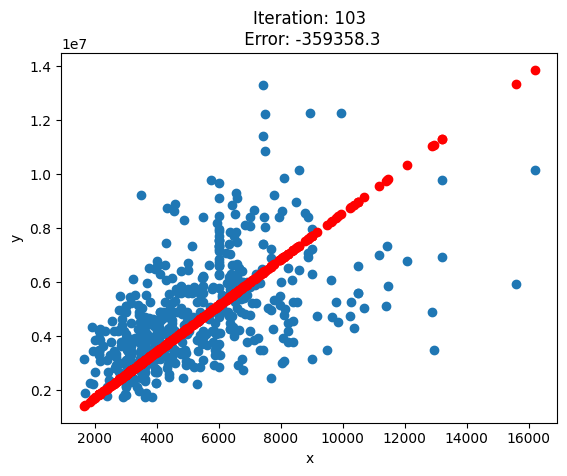

In [215]:

# СОБСТВЕННЫЙ ГРАДИЕНТНЫЙ СПУСК

data = pd.read_csv('./Housing.csv')
# Создание весов (3 ряда, 1 колонка)
W = np.ones((4,1))

# Создание матрицы X 
X = data.iloc[:, :4]
X.columns = ['x0','x1','x2','x3']
X.x0 = 1
y = data.iloc[:, 0]
y = np.array(y).reshape(-1,1)

# Создание learning_rate (alpha)
lr = 0.00000000001
prev = 0

for i in range(200):
	# напишіть функцію гіпотези лінійної регресії у векторному вигляді;
    y_hat = np.dot(X, W)
    
	# створіть функцію для обчислення функції втрат у векторному вигляді;
    error = y_hat - y
    mse = (y_hat - y) ** 2 / (2*len(y))
    
	# реалізуйте один крок градієнтного спуску;
    grad = np.dot(X.T, error)

    # знайдіть найкращі параметри для датасету 
    # прогнозуючу ціну на будинок залежно 
    # від площі  (x1), 
    # кількості ванних кімнат (x2)
    # та кількості спалень (x3) 
    W = W - lr * grad
    
	# Подсчет estimation
    estimation = np.dot(X, W)
    
	# отображение
    clear_output(wait=True)
    plt.title(f'Iteration: {i}\n Error: {error.mean().round(1)}')
    plt.ylabel('y')
    plt.xlabel('x')
    plt.scatter(X.x1, y)
    plt.scatter(X.x1, estimation, color='red')
    plt.show()

    if error.mean().round(2) == prev:
        break
    else:
        prev = error.mean().round(2)



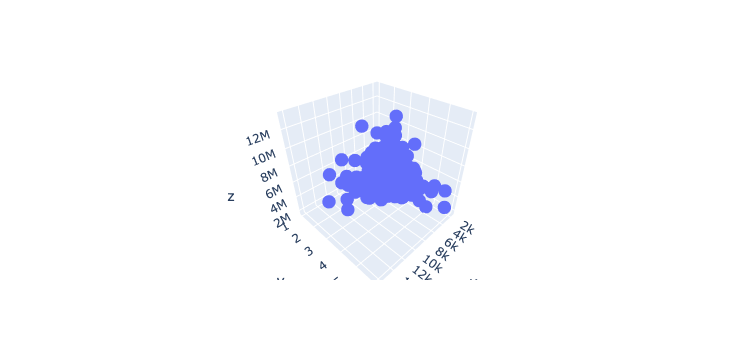

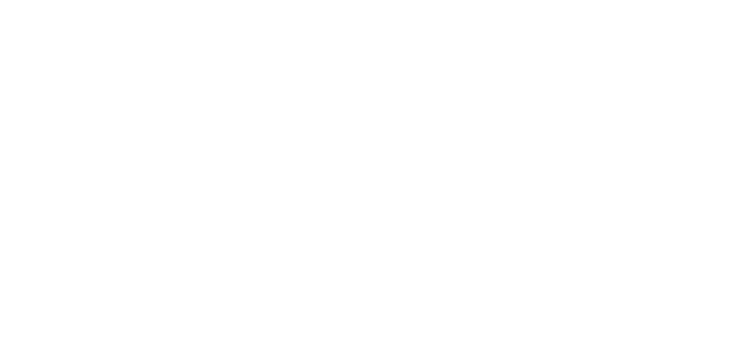

In [220]:
fig1 = px.scatter_3d(x=X.x1, y=X.x2, z=y.reshape(-1))
fig1.show()

fig2 = px.scatter_3d(x=X.x1, y=X.x2, z=y_hat.reshape(-1))
fig2.show()


In [190]:
# АНАЛИТИЧЕСКОЕ РЕШЕНИЕ ПРОТИВ ОБЫЧНОГО ?

X_d = data.iloc[:, 1:4]
X_d.columns = ['x1','x2', 'x3']
X_A = np.concatenate([
    np.ones((len(X_d),1)),
    np.array(X_d.x1).reshape(-1,1),
    np.array(X_d.x2).reshape(-1,1),
    np.array(X_d.x3).reshape(-1,1)],
                   axis=1)


# Аналитическое
W_a = np.dot(np.dot(X_A.T, X_A)**-1, np.dot(X.T, y))
ic(W_a)

# Обычное
ic(W)


ic| W_a: array([[2.00363478e+07],
                [3.69268629e+03],
                [6.57219019e+06],
                [1.47898720e+07]])
ic| W: array([[3.48732704e-01],
              [8.55709179e+02],
              [1.21242217e+00],
              [6.30530824e-01]])


array([[3.48732704e-01],
       [8.55709179e+02],
       [1.21242217e+00],
       [6.30530824e-01]])

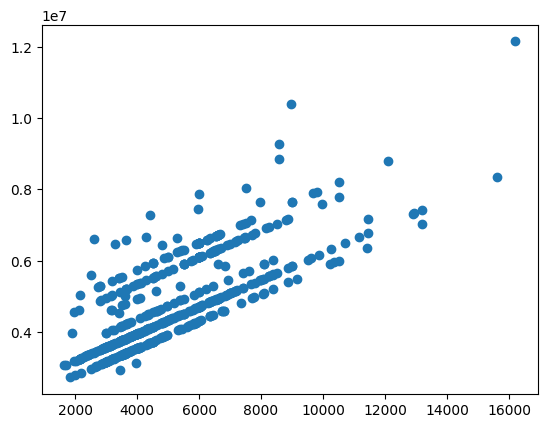

In [206]:
# SKlearn


# Initialize linear regression model
model = LinearRegression()

# Training the model
model.fit(X_A, y)

# # Making predictions on the training data
y_hat = model.predict(X_A)


plt.scatter(X_A.T[1], y_hat)